## Laboratorio 2: Modelo lineal y minimos cuadrados.

Manuel Felipe Pineda


- Consulte para que sirven los comandos fmincon, fminsearch de MatLab: 
  
  R:   
    **fmincon**, es un optimizador de funciones multivariadas no lineales, sujetas a restricciones.
    
    **fminsearch**, tiene el mismo objetivo pero con la diferencia es que la funcion ya no tiene restricciones.
  
    Es importante resaltar que ninguno de los metodos necesita la derivada de las funciones para encontrar el minimo.
    
    Dado que ambas funciones son propias de matlab, se listan algunas alternativas open-source compatibles 
    con otros lenguajes y que cumplen las mismas funciones.
    
    [NLopt](http://ab-initio.mit.edu/wiki/index.php/NLopt) es una alternativa muy completa que se puede correr con 
    muchos lenguajes. Posee muchas funciones de optimizacion no lineal las cuales pueden resultar utiles en diferentes
    escenarios.
    
    La segunda opcion es solo para python, [scipy](http://www.scipy.org/) es un paquete para python el cual incluye
    una gran cantidad de metodos de optimizacion, entre ellos:
    
           - fmin_l_bfgs_b -- optimizacion L-BFGS-B con restricciones

           - fmin_tnc      -- Metodo trucado de Newton.

           - fmin_cobyla   -- Optimizacion con restricciones por aproximacion lineal
           
- Consulte la utilidad de la tecnica 'TSVD (descomposicion en valores singulares truncada) para lo solucion de problemas lineales.'

  R: La TSVD es una aproximacion de la SVD pero con menor rango, computacionalmente es una ventaja importante dado que
  muchas veces las matrices de la SVD contienen muchos ceros. Algunas aplicaciones practicas son la 
  compresion de imagenes y el analisis de la relacion entre conjuntos de documentos 
  [ver LSA](https://en.wikipedia.org/wiki/Latent_semantic_analysis)
  
  En python se puede usar la funcion svd de scipy modificando el parametro *full_matrices* en caso
  de que se desee una aproximacion.
  
  Tambien puede usarse la funcion TruncatedSVD de [scikit](http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.TruncatedSVD.html)
  
  
- Consulte la utilidad del operador \ de MatLab.

  R: A \ B calcula inv(A) * B, tambien realiza aproximaciones en caso de que A no sea cuadrada o sea *casi* singular.
     En caso de que A sea rectangular realiza una solucion por minimos cuadrados al problema A * x = B
     
     En python puede ser calculada con pinv.
     
- Consulte la funciones pdist y pdist2 de MatLab.

- Consulte los comandos eig y svd de MatLab.

- Demuestre en que consiste la solucion dual del problema de minimos cuadrados.

- Si utiliza Python, consulte las funciones equivalentes en este lenguaje a los solicitadas en las actividades para MatLab.

- Revise el codigo de muestra 'demo_mincuadrados.m'.

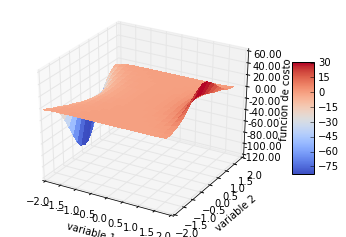

In [46]:
%matplotlib inline

from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import matplotlib.pyplot as plt
import numpy as np


fig = plt.figure()
ax = fig.gca(projection='3d')


x = np.arange(-2, 2, 0.2)
y = np.arange(-2, 2, 0.2)
xx, yy = np.meshgrid(x, y, sparse=True)
z = np.multiply(xx, np.exp(xx ** 2 - yy ** 2))

# h = plt.contourf(x,y,z)

surf = ax.plot_surface(xx, yy, z, rstride=1, cstride=1,
                       cmap=cm.coolwarm, linewidth=0, antialiased=False)

ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

fig.colorbar(surf, shrink=0.5, aspect=5)

ax.set_xlabel('variable 1')
ax.set_ylabel('variable 2')
ax.set_zlabel('funcion de costo')

plt.show() 



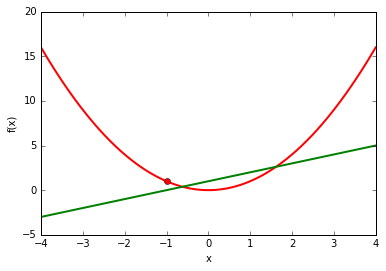

In [58]:
x = np.linspace(-4, 4, 200)

def f(x): 
    return x ** 2

def g(x):
    return x + 1

fx = f(x)
gx = g(x)
x0 = -1

plt.plot(x, fx, 'r', linewidth=2.0)
plt.plot(x, gx, 'g', linewidth=2.0)
plt.plot(x0, f(x0), 'ro')
plt.xlabel('x')
plt.ylabel('f(x)')

plt.show()

- Encuentre el minimo de f(x) para la restriccion $g(x) = x^3 − 8 = 0$ graficando la funcion de costo y la restriccion en la seccion 2.

- Cambie la varianza del ruido blanco gaussiano en la seccion 3 del c  ́ odigo y explique que pasa con los datos.  ́

- Cambie el dominio de los datos para la funcion sinc de la seccion 4 del codigo y explique que pasa con la aproximacion lineal.

Utilice una funcion base polinomial y una sigmoidal para aproximar la funcion sinc variando los parametros de las funciones base y la varianza del ruido.

Realice una aproximacion de alguna variable de interes de una base de datos del repositorio Kaggle. Utilice un modelo lineal con y sin regularizacion, y al menos dos modelos lineales con representacion no lineal regularizados. Grafique las matrices de covarianza, su espectro de valores propios, y la variable aproximada para cada uno de los casos.